## Finding Your Way In The City (Graph Edition)
In this notebook your attention will shift from grids to graphs. At least for search ... 

Using Voronoi graphs and the medial axis transform we can find paths which maximize safety from obstacles. In addition, graph representation allows further optimizations and more succinct queries.

In [22]:
# OK this might look a little ugly but...
# need to import the latest version of networkx
# This occassionally fails, so if the next cell 
# doesn't show that you're using networkx 2.1
# please "restart and clear output" from "Kernel" menu
# above and try again.
import sys
!{sys.executable} -m pip install -Iv networkx==2.1
import pkg_resources
pkg_resources.require("networkx==2.1")
import networkx as nx

  1 location(s) to search for versions of networkx:
  * https://pypi.python.org/simple/networkx/
  Getting page https://pypi.python.org/simple/networkx/
  Looking up "https://pypi.python.org/simple/networkx/" in the cache
  Current age based on date: 2382
  Freshness lifetime from max-age: 600
  Freshness lifetime from request max-age: 600
  The cached response is "stale" with no etag, purging
  Starting new HTTPS connection (1): pypi.python.org
  "GET /simple/networkx/ HTTP/1.1" 200 11240
  Updating cache with response from "https://pypi.python.org/simple/networkx/"
  Caching b/c date exists and max-age > 0
  Analyzing links from page https://pypi.python.org/simple/networkx/
    Skipping link https://pypi.python.org/packages/e9/19/4f6af1a5e781eeba775405bc9bee1c9a736707544286b5bf09871914b6af/networkx-0.34-py2.4.egg#md5=cbe7a56fbd664e34ba1df175e10a0c71 (from https://pypi.python.org/simple/networkx/); unsupported archive format: .egg
    Skipping link https://pypi.python.org/packages/30/

  1 location(s) to search for versions of decorator:
  * https://pypi.python.org/simple/decorator/
  Getting page https://pypi.python.org/simple/decorator/
  Looking up "https://pypi.python.org/simple/decorator/" in the cache
  Current age based on date: 2380
  Freshness lifetime from max-age: 600
  Freshness lifetime from request max-age: 600
  The cached response is "stale" with no etag, purging
  "GET /simple/decorator/ HTTP/1.1" 200 2487
  Updating cache with response from "https://pypi.python.org/simple/decorator/"
  Caching b/c date exists and max-age > 0
  Analyzing links from page https://pypi.python.org/simple/decorator/
    Found link https://pypi.python.org/packages/48/22/58f948f7bc5de0b1aa1aaddb0d294b9333495009dda1fb08443dec5381a9/decorator-3.3.1.tar.gz#md5=a8fc62acd705f487a71bc406e19e0cc6 (from https://pypi.python.org/simple/decorator/), version: 3.3.1
    Found link https://pypi.python.org/packages/f5/52/a4f3efffddfdfa602b9bb9d77ee984e2ee7c6c62a87de3016e51f5a83a75/decorat

  Looking up "https://pypi.python.org/packages/e1/5a/53db15bf367d2028bdc6700dbdf1bdfab46b9f208b7516952817c0808118/decorator-4.2.1-py2.py3-none-any.whl" in the cache
  Current age based on date: 2380
  Freshness lifetime from max-age: 31557600
  The response is "fresh", returning cached response
  31557600 > 2380
  Using cached decorator-4.2.1-py2.py3-none-any.whl


Cleaning up...
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
nx.__version__ # should be 2.1

'2.1'

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid_and_edges
import numpy.linalg as LA
%matplotlib inline 

In [25]:
plt.rcParams['figure.figsize'] = 12, 12

In [26]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-305.  -435.    85.5    5.     5.    85.5]
 [-295.  -435.    85.5    5.     5.    85.5]
 [-285.  -435.    85.5    5.     5.    85.5]
 ..., 
 [ 435.   465.     8.     5.     5.     8. ]
 [ 445.   465.     8.     5.     5.     8. ]
 [ 455.   465.     8.     5.     5.     8. ]]


Starting and goal positions in *(north, east)*.

In [27]:
start_ne = (25,  100)
goal_ne = (750., 370.)

In [28]:
# Static drone altitude (metres)
drone_altitude = 5
safety_distance = 3

In [29]:
# This is now the routine using Voronoi
grid, edges = create_grid_and_edges(data, drone_altitude, safety_distance)
print(len(edges))

-310.0 500.0
-440.0 470.0
810 910
1065


Plot the edges on top of the grid along with start and goal locations.

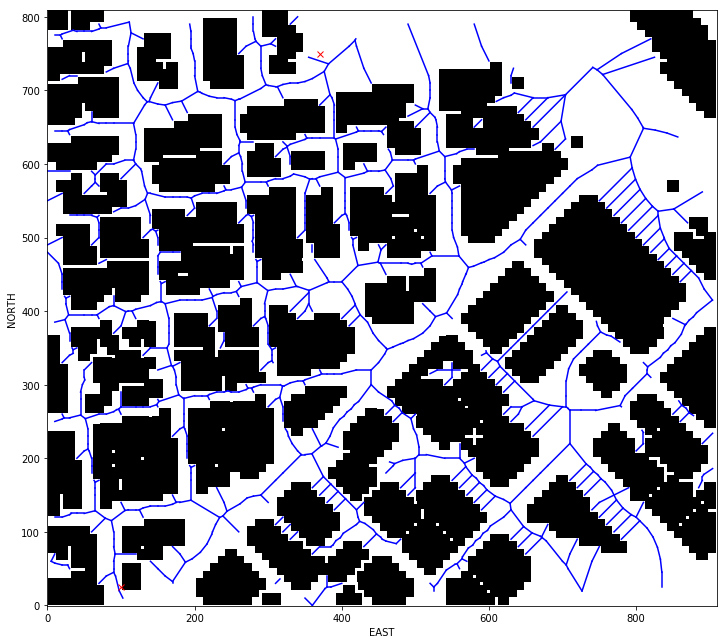

In [30]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower', cmap='Greys') 

for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

    
plt.plot(start_ne[1], start_ne[0], 'rx')
plt.plot(goal_ne[1], goal_ne[0], 'rx')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

We now have a graph, well at least visually. The next step is to use the [`networkx`](https://networkx.github.io) to create the graph. **NetworkX** is a popular library handling anything and everything related to graph data structures and algorithms.

**NOTE:** In the initial import above it was imported with the `nx` alias.

You're encouraged to read the documentation but here's a super quick tour:

1. Create a graph:

```
G = nx.Graph()
```

2. Add an edge:

```
p1 = (10, 2.2)
p2 = (50, 40)
G = nx.add_edge(p1, p2)
```

3 Add an edge with a weight:

```
p1 = (10, 2.2)
p2 = (50, 40)
dist = LA.norm(np.array(p2) - np.array(p1))
G = nx.add_edge(p1, p2, weight=dist)
```

In [31]:
# TODO: create the graph with the weight of the edges
# set to the Euclidean distance between the points
G = nx.Graph()

for e in edges:
    p1 = e[0]
    p2 = e[1]
    dist = LA.norm(np.array(p2) - np.array(p1))
    G.add_edge(p1, p2, weight=dist)

You need a method to search the graph, and you'll adapt A* in order to do this. The notable differences being the actions are now the outgoing edges and the cost of an action is that weight of that edge.

In [42]:
from queue import PriorityQueue

def heuristic(n1, n2):
    #TODO: define a heuristic
    #print(n1, n2)
    p1 = np.array(n1)
    p2 = np.array(n2)
    h = np.sqrt(np.sum((p1-p2)**2))
    return 0

###### THIS IS YOUR OLD GRID-BASED A* IMPLEMENTATION #######
###### With a few minor modifications it can work with graphs! ####
#TODO: modify A* to work with a graph
def a_star(graph, heuristic, start, goal):
    
    path = []
    queue = PriorityQueue()
    queue.put((0, start))
    visited = set(start)

    branch = {}
    found = False
    
    while not queue.empty():
        item = queue.get()
        current_cost = item[0]
        current_node = item[1]

        if current_node == goal:        
            print('Found a path.')
            found = True
            break
            
        else:
            for next_node in graph[current_node]:
                # get the tuple representation
                cost = graph.edges[current_node, next_node]['weight']
                new_cost = current_cost + cost + heuristic(next_node, goal)
                
                if next_node not in visited:                
                    visited.add(next_node)               
                    queue.put((new_cost, next_node))
                    
                    branch[next_node] = (new_cost, current_node)
             
    path = []
    path_cost = 0
    if found:
        
        # retrace steps
        path = []
        n = goal
        path_cost = branch[n][0]
        while branch[n][1] != start:
            path.append(branch[n][1])
            n = branch[n][1]
        path.append(branch[n][1])
            
    return path[::-1], path_cost

### Solution

This solution consists of two parts:

1. Find the closest point in the graph to our current location, same thing for the goal location.
2. Compute the path from the two points in the graph using the A* algorithm.
3. Feel free to use any of the path pruning techniques to make the path even smaller! 
4. Plot it up to see the results!

### TODO: Write your solution!

In [43]:
def closest_point(graph, current_point):
    """
    Compute the closest point in the `graph`
    to the `current_point`.
    """
    closest_point = None
    dist = 100000
    for p in graph.nodes:
        d = LA.norm(np.array(p) - np.array(current_point))
        if d < dist:
            closest_point = p
            dist = d
    return closest_point

In [44]:
start_ne_g = closest_point(G, start_ne)
goal_ne_g = closest_point(G, goal_ne)

print(start_ne_g)
print(goal_ne_g)

path, cost = a_star(G, heuristic, start_ne_g, goal_ne_g)
print(len(path))

(20.0, 97.5)
(745.0, 354.99999000001503)
Found a path.
109


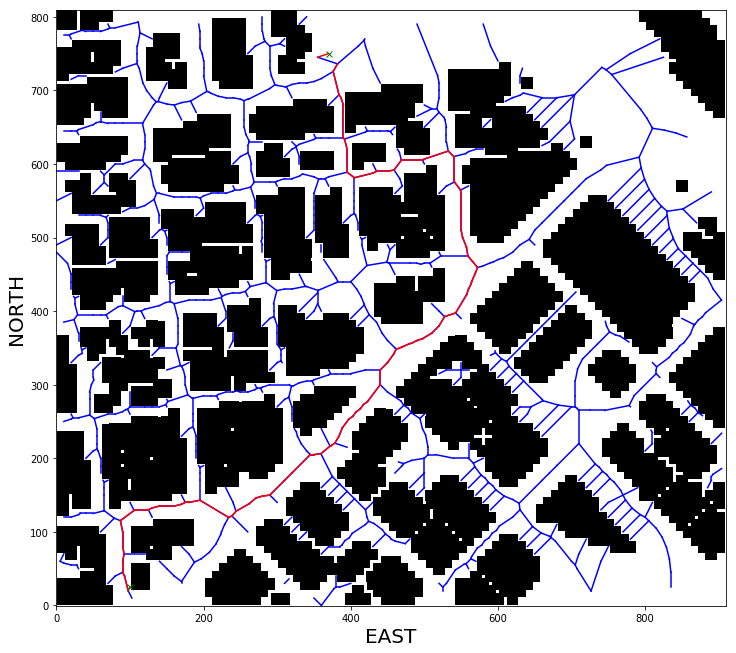

In [45]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower', cmap='Greys') 

for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')
    
plt.plot([start_ne[1], start_ne_g[1]], [start_ne[0], start_ne_g[0]], 'r-')
for i in range(len(path)-1):
    p1 = path[i]
    p2 = path[i+1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'r-')
plt.plot([goal_ne[1], goal_ne_g[1]], [goal_ne[0], goal_ne_g[0]], 'r-')
    
plt.plot(start_ne[1], start_ne[0], 'gx')
plt.plot(goal_ne[1], goal_ne[0], 'gx')

plt.xlabel('EAST', fontsize=20)
plt.ylabel('NORTH', fontsize=20)
plt.show()

[our solution](/notebooks/Graph-Search-Solution.ipynb)